In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [ ]:
size=25
n = size*size

def epsilon_0():
    return 0.1   # Example value

b0 = np.ones(size*size).reshape(size,size)
b1 = np.ones(size*size).reshape(size,size)
b2 = np.ones(size*size).reshape(size,size)

for i in range(size):
    for j in range(size):
      epsilon_value = epsilon_0()
      b1[i,j] = 1+(i+j)/12+ epsilon_value * np.random.normal(0, 1)
      b0[i, j] = 5 / (12.5**4) * (12.5**2 - (12.5- i)**2) * (12.5**2 - (12.5 - j)**2)+ epsilon_value * np.random.normal(0, 1)


b2 = np.flipud(b1)

b0 = b0.reshape(-1)
b1 = b1.reshape(-1)
b2 = b2.reshape(-1)

In [ ]:
def plot_s(b,sub_title=['','','','',''],title="",non_spatial=[],vmin=None,vmax=None,interpolation=None):
    k = len(b)
    fig, axs = plt.subplots(1, k,figsize=(6*k,4),dpi=300)
    for i in range(k):
        for m in non_spatial:
            if i == m[0]:
                ax = axs[i].scatter(m[1],m[2],s=5,color="black")
                axs[i].set_ylim([m[3],m[4]])
                axs[i].set_xlim([-2.5,2.5])
                #axs[i].set_ylabel(r'$\phi_{}$'.format(i),fontsize=16)
                axs[i].set_xlabel(r'$X_{}$'.format(i),fontsize=16)

                break

        else:
            ax = axs[i].imshow(b[i].reshape(size,size),cmap=plt.cm.get_cmap('viridis',36),
                               vmin=vmin,vmax=vmax,interpolation=interpolation)

            fig.colorbar(ax, ax=axs[i])

            axs[i].set_xticks(np.arange(-0.5, size, 5))
            axs[i].set_yticks(np.arange(-0.5, size, 5))
            axs[i].set_xticklabels([])
            axs[i].set_yticklabels([])

            axs[i].tick_params(axis='x', colors=(0,0,0,0))
            axs[i].tick_params(axis='y', colors=(0,0,0,0))

        axs[i].set_title(sub_title[i],fontsize=18,y=1.05)

    #fig.suptitle(title, fontsize=25,y=1.1)

    plt.savefig(title + ".png",bbox_inches='tight')

In [ ]:
np.random.seed(222)

X1 = np.random.uniform(-2,2,size*size)
X2 = np.random.uniform(-2,2,size*size)
# X3 = np.random.uniform(-2,2,size*size)
# X4 = np.random.uniform(-2,2,size*size)

err = np.random.randn(size*size)

X = np.vstack([X1,X2]).T
# X = np.vstack([X1,X2,X3]).T

u = np.array([np.linspace(0,size-1,num=size)]*size).reshape(-1)
v = np.array([np.linspace(0,size-1,num=size)]*size).T.reshape(-1)
coords = list(zip(u,v))

k = X.shape[1];n = X.shape[0]

In [ ]:
names=['X1','X2', 'x_coord','y_coord']

X_coords = pd.DataFrame(np.concatenate([X,np.array(coords)],axis=1),columns=names)

X_coords = X_coords - X_coords.mean(axis=0)

In [ ]:
f0 = b0
f1 = b1*X_coords.values[:,0]
f2 = b2*X_coords.values[:,1]
# f3 = X_coords.values[:,2]*2
# f4 = X_coords.values[:,3]**2

y = pd.DataFrame(f0 + f1 + f2 + err,columns=['y'])
#y = y - y.mean()

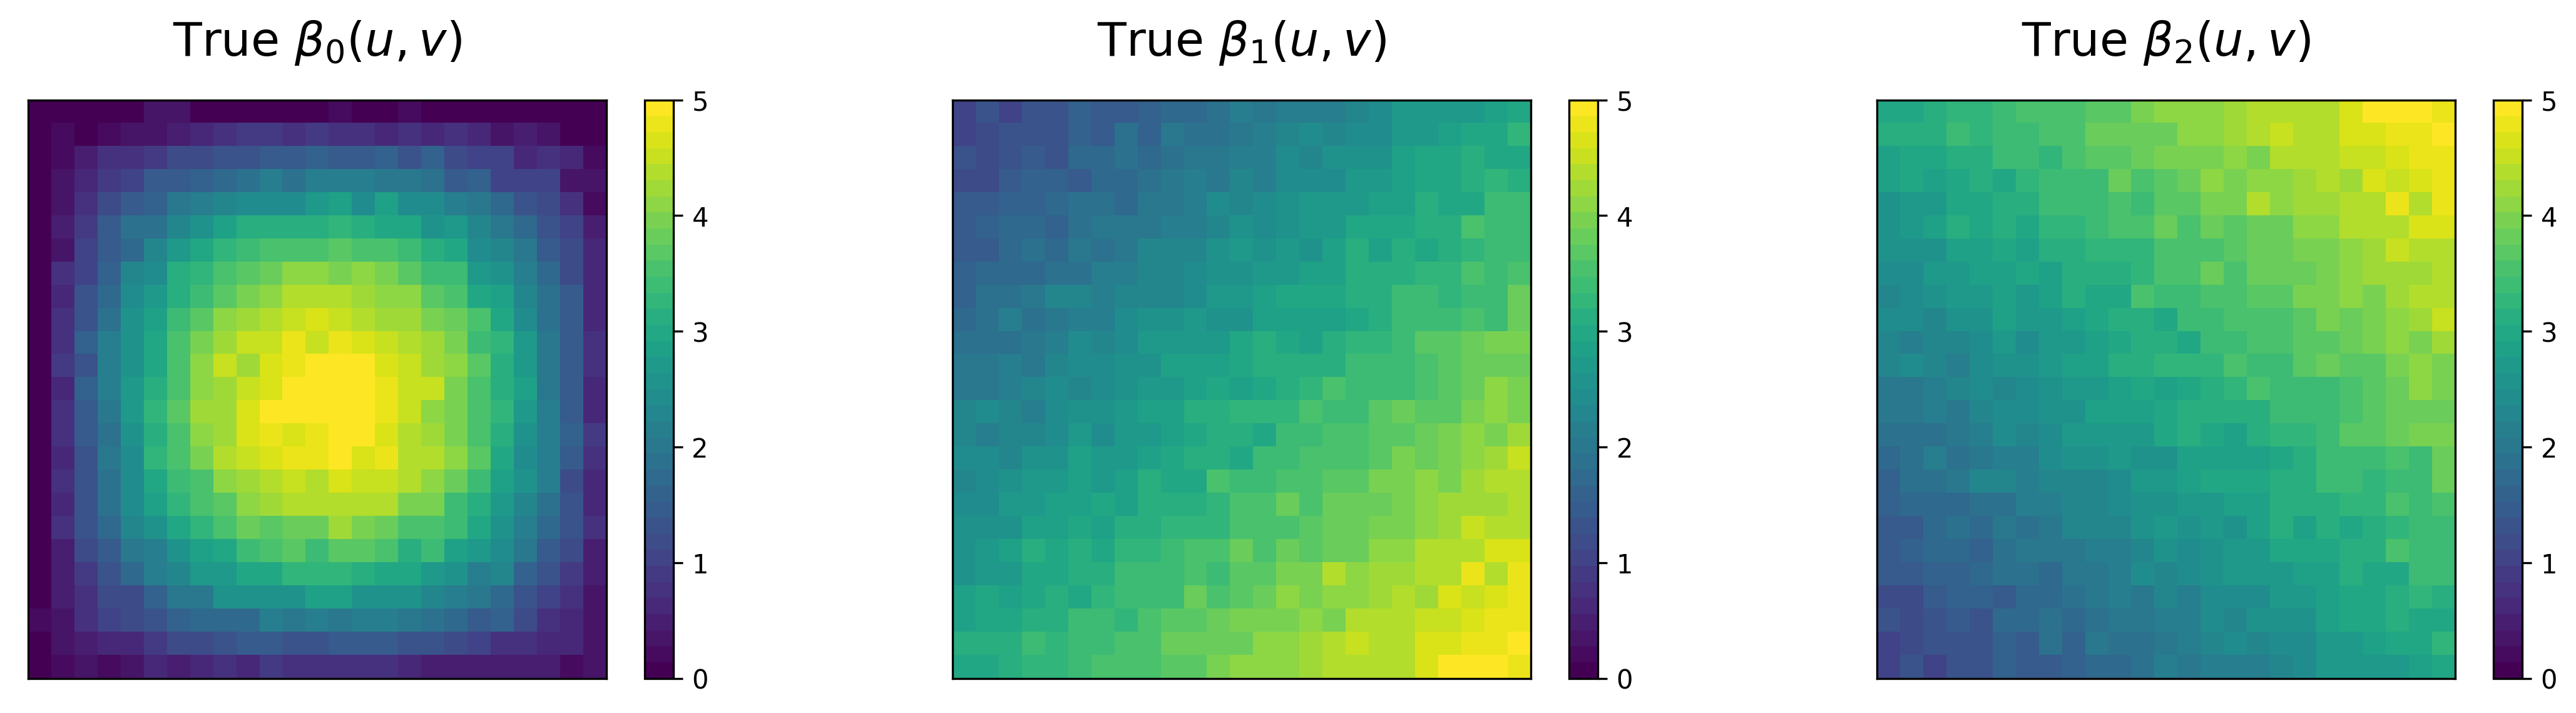

In [ ]:
warnings.filterwarnings('ignore')
# sub_t = [r"True $\beta_0(u,v)$",r"True $\beta_1(u,v)$",r"$\beta_2(u,v)$",r"$f_{3}(X_{3})$", r"$f_{4}(X_{4})$"]
sub_t = [r"True $\beta_0(u,v)$",r"True $\beta_1(u,v)$",r"True $\beta_2(u,v)$"]
# plot_s(np.vstack([b0,b1,b2]),sub_title=sub_t,vmin=0,vmax=5,title="Data Generating Processes",
#        non_spatial=[[3,X_coords.values[:,2], f3,-6,6],
#                     [4,X_coords.values[:,3], f4,-1,5]])
# plot_s(np.vstack([b0,b1,b2]),sub_title=sub_t,title="Data Generating Processes")
# plot_s(np.vstack([b0,b1,b2]),sub_title=sub_t,vmin=0,vmax=5,title="Data Generating Processes")
plot_s(np.vstack([b0,b1,b2]),sub_title=sub_t,vmin=0,vmax=5, title="Data Generating Processes")

# plt.savefig("/picture/Data_Generating_Processes.png", bbox_inches='tight')

In [ ]:
pip install mgwr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.9/389.9 kB 8.1 MB/s eta 0:00:00


In [ ]:
import sys

from mgwr.gwr import GWR,MGWR
from mgwr.sel_bw import Sel_BW

In [ ]:
from multiprocessing import Pool
pool = Pool()

In [ ]:
sel = Sel_BW(coords,y.values.reshape(-1,1),X_coords.values[:,:-2],multi=True)
sel.search(pool=pool)

Backfitting:   0%|          | 0/200 [00:00<?, ?it/s]

array([ 46.,  70., 115.])

In [ ]:
mgwr_rslt = MGWR(coords,y.values.reshape(-1,1),X_coords.values[:,:-2],selector=sel).fit(pool=pool)

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
mgwr_rslt.R2

np.float64(0.9662837793757035)

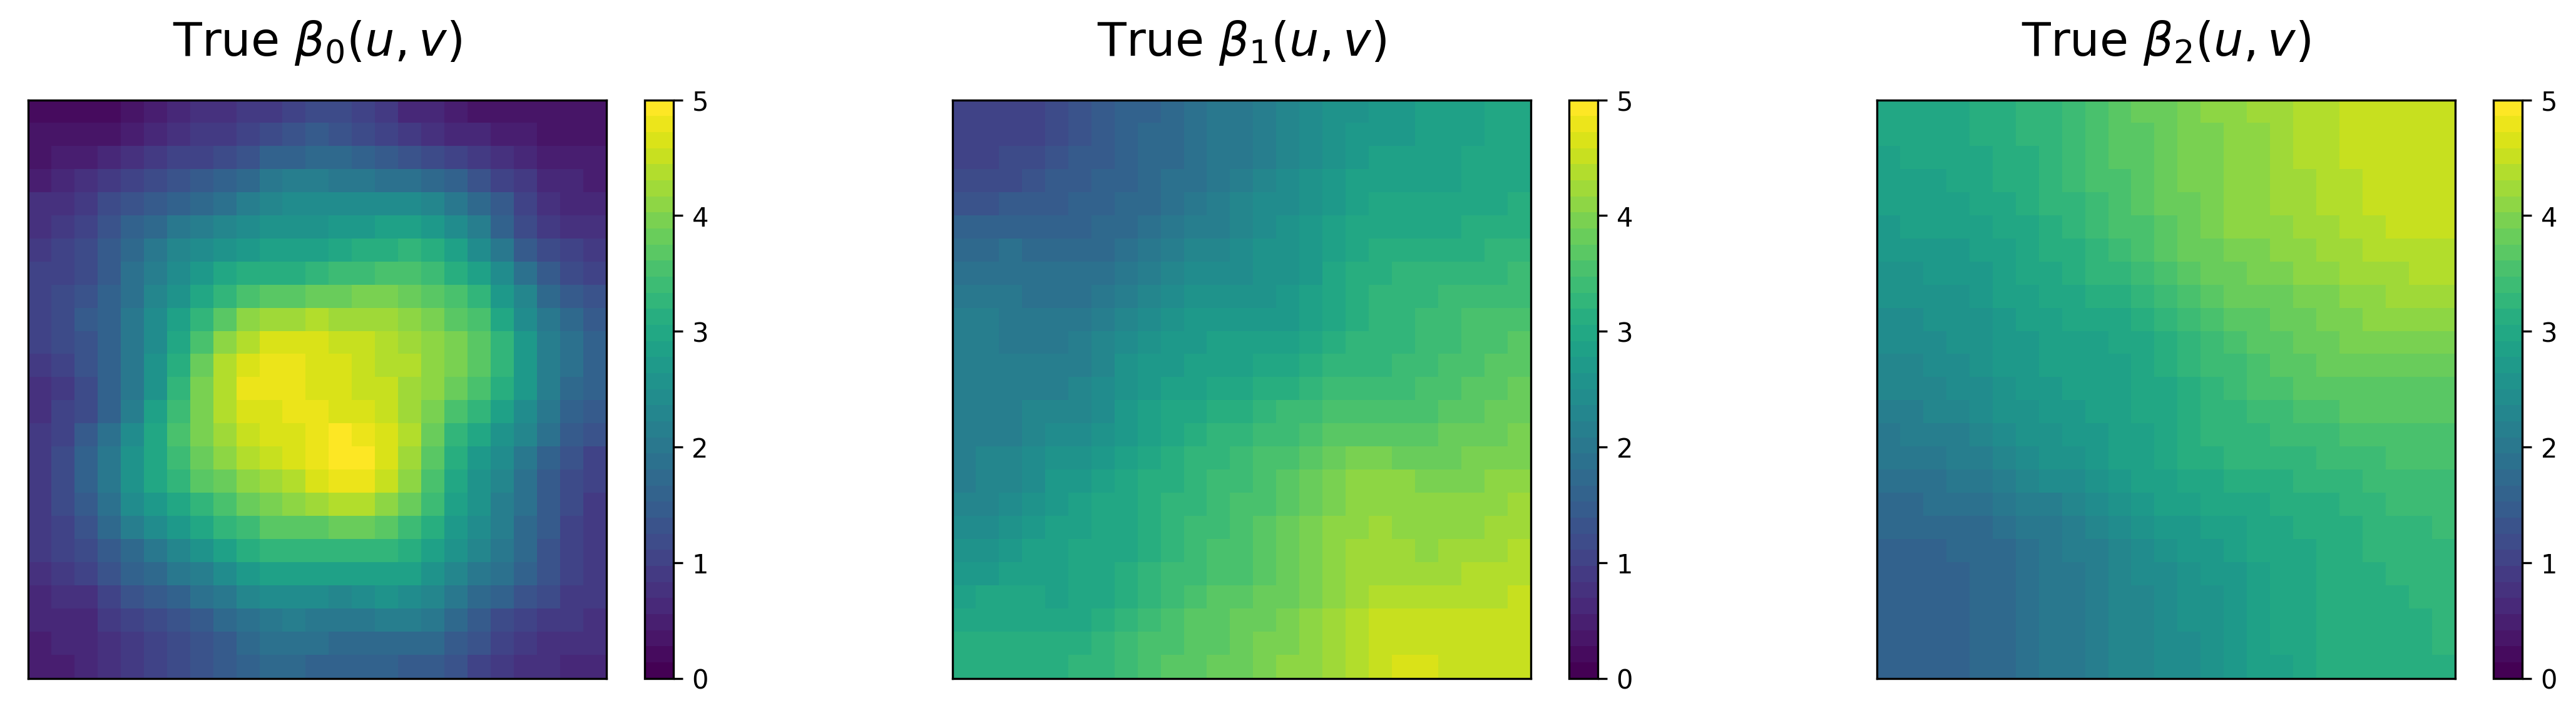

In [ ]:
plot_s(mgwr_rslt.params.T,sub_title=sub_t,title="MGWR", vmin=0, vmax=5)
# plt.savefig("/picture/MGWR.png", bbox_inches='tight')

In [ ]:
pip install shap geoshapley

In [18]:
import numpy as np
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Kernel, StationaryKernelMixin, NormalizedKernelMixin, Matern
from sklearn.metrics import mean_absolute_percentage_error, make_scorer, root_mean_squared_error
from sklearn.model_selection import cross_val_score
import geopandas as gpd
import geoshapley
from geoshapley import GeoShapleyExplainer
import warnings
warnings.filterwarnings("ignore")

class GeographicalSimilarityKernel(StationaryKernelMixin, NormalizedKernelMixin, Kernel):
    def __init__(self, P_function, sigma_values, epsilon=0.0001):
        self.P_function = P_function
        self.sigma_values = sigma_values
        self.epsilon = epsilon

    def _calculate_similarity(self, u, v):
        u = u[:, np.newaxis, :]
        v = v[np.newaxis, :, :]
        sq_diff = (u - v) ** 2
        E_i = np.exp(-((sq_diff) / (2 * (self.sigma_values**2))))
        return E_i

    def __call__(self, X, Y=None, eval_gradient=False):
        if Y is None:
            Y = X
        E_i = self._calculate_similarity(X, Y)
        S_uv = np.average(E_i, axis=2, weights=self.P_function)
        return S_uv

    def diag(self, X):
        return np.diag(np.ones(X.shape[0])) + self.epsilon

    def is_stationary(self):
        return True

# Define the objective function for Bayesian optimization
def objective(params):
    P_function = np.concatenate((np.array(params['P_function']), [0, 0]))
    length_scale = params['length_scale']
    nu = params['nu']
    w = params['w']

    similarity_kernel = GeographicalSimilarityKernel(P_function=P_function, sigma_values=sigma_values)
    kernel = similarity_kernel + w * Matern(length_scale=length_scale, nu=nu)

    gpr = GaussianProcessRegressor(kernel=kernel, alpha=1e-1, optimizer=None)
    neg_rmse_scorer = make_scorer(root_mean_squared_error, greater_is_better=False)
    scores = cross_val_score(gpr, X_coords, y, scoring=neg_rmse_scorer, cv=5)

    loss = -np.mean(scores)
    return {'loss': loss, 'status': STATUS_OK}

# sigma_values = np.var(X_coords, axis=0)
sigma_values = np.array(np.var(X_coords, axis=0))

# Define the search space
space = {
    # 'P_function': [hp.uniform(f'p{i}', 0.1, 5) for i in range(len(names) - 2)],
    'P_function': [hp.uniform(f'p{i}', 0.1, 5) for i in range(2)],
    'length_scale': hp.uniform('length_scale', 0.1, 5),
    'nu': hp.uniform('nu', 0.5, 2.5),
    'w': hp.uniform('w', 0.05, 0.2)
}

# Run Bayesian optimization with Hyperopt
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials)

# Extract optimized parameters
optimized_P_function = np.concatenate(([best[f'p{i}'] for i in range(len(names) - 2)], [0, 0]))
optimized_length_scale = best['length_scale']
optimized_nu = best['nu']
optimized_w = best['w']

print("Optimized P_function:", optimized_P_function)
print("Optimized length_scale:", optimized_length_scale)
print("Optimized nu:", optimized_nu)
print("Optimized weight w:", optimized_w)

# Train and evaluate the model with optimized parameters
similarity_kernel = GeographicalSimilarityKernel(P_function=optimized_P_function, sigma_values=sigma_values)
kernel = similarity_kernel + optimized_w * Matern(length_scale=optimized_length_scale, nu=optimized_nu)
gpr = GaussianProcessRegressor(kernel=kernel, alpha=1e-1, optimizer=None)
gpr.fit(X_coords, y)

y_pred = gpr.predict(X_coords)
mape = mean_absolute_percentage_error(y, y_pred)
print("MAPE:", mape)

r2 = gpr.score(X_coords, y)
print("R² Score:", r2)

100%|██████████| 50/50 [01:55<00:00,  2.31s/trial, best loss: 1.4711600134109524]
Optimized P_function: [3.43566483 2.32601261 0.         0.        ]
Optimized length_scale: 4.746344408186715
Optimized nu: 1.9937324368839966
Optimized weight w: 0.19981276060467537
MAPE: 0.8804297986197173
R² Score: 0.971318655853459


In [19]:
background_X = X_coords.values
gpr_explainer = GeoShapleyExplainer(gpr.predict, background_X)

gpr_rslt = gpr_explainer.explain(X_coords,n_jobs=-1)

  0%|          | 0/625 [00:00<?, ?it/s]

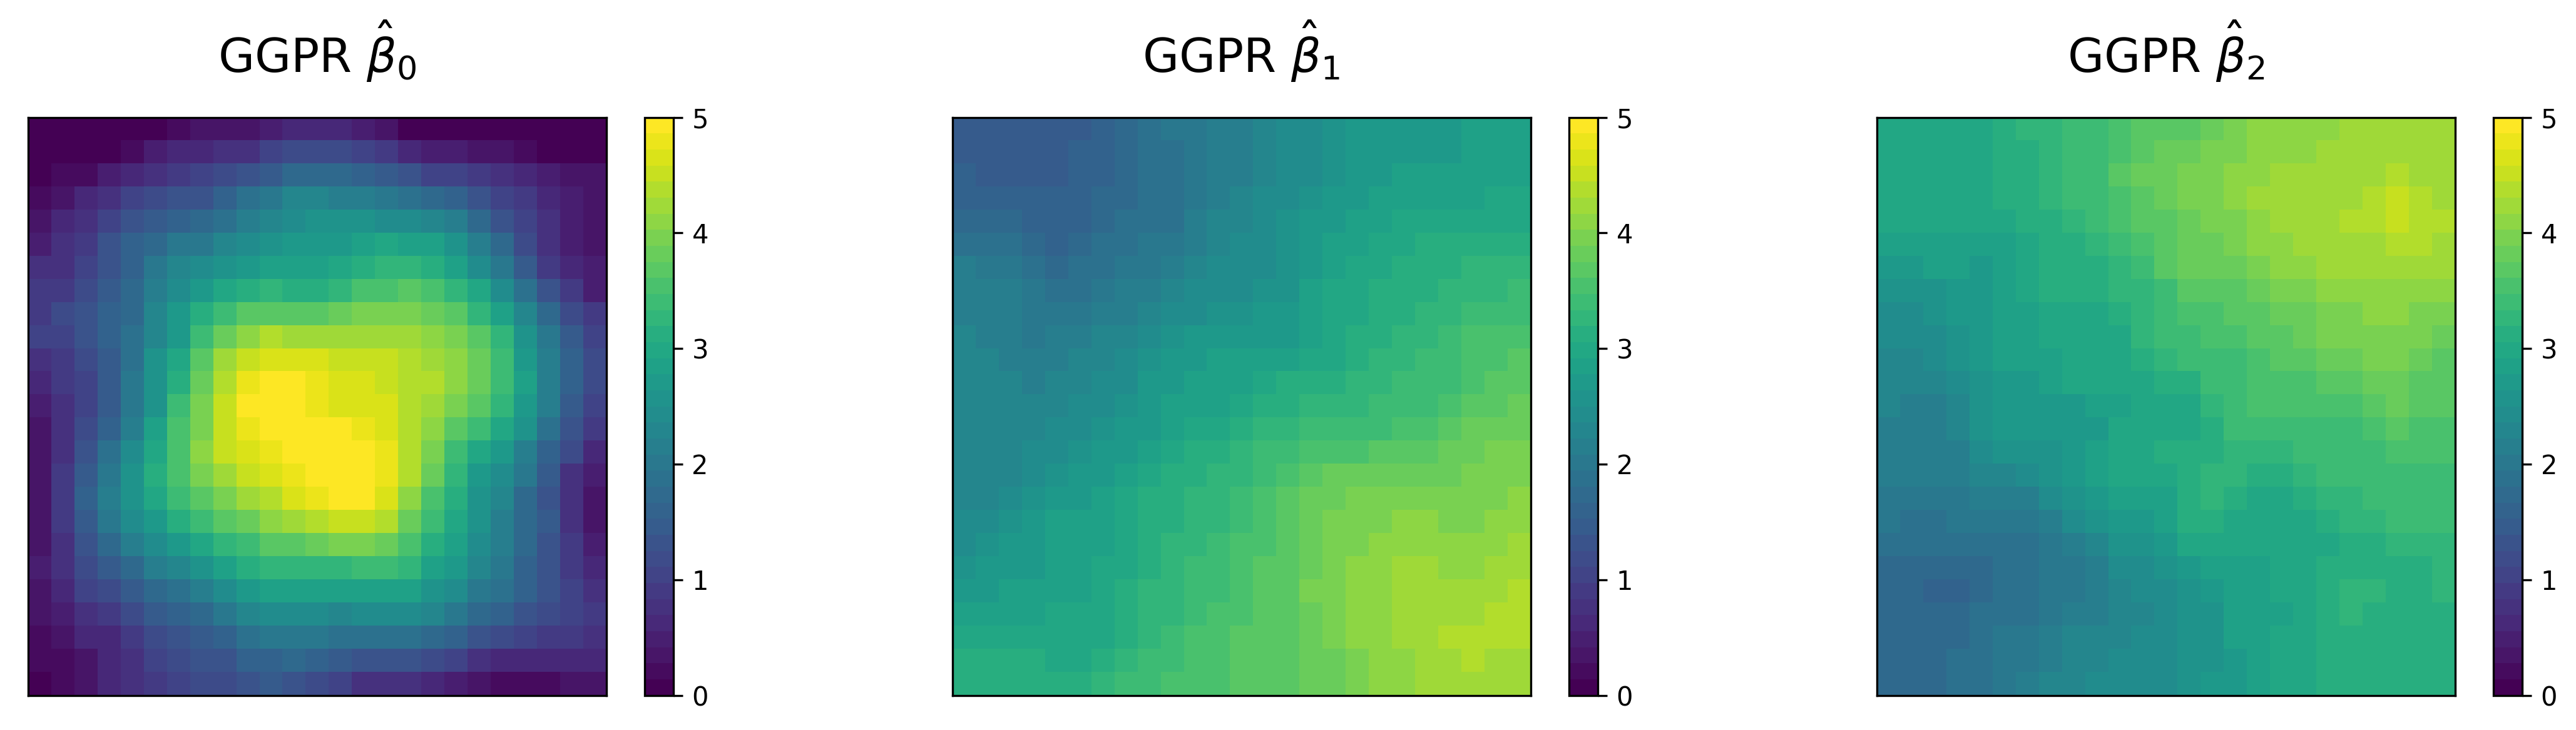

In [20]:
gpr_svc = gpr_rslt.get_svc(col = [0,1],coef_type="gwr",include_primary=True)
sub_t = [r"GGPR $\hat{\beta}_0$",r"GGPR $\hat{\beta}_1$",r"GGPR $\hat{\beta}_2$"]

plot_s(np.hstack([gpr_rslt.base_value + gpr_rslt.geo.reshape(-1,1), gpr_svc]).T,sub_title=sub_t,vmin=0,vmax=5,
       title="GGPR Explanations")
# plt.savefig("/picture/GGPR1.png", bbox_inches='tight')

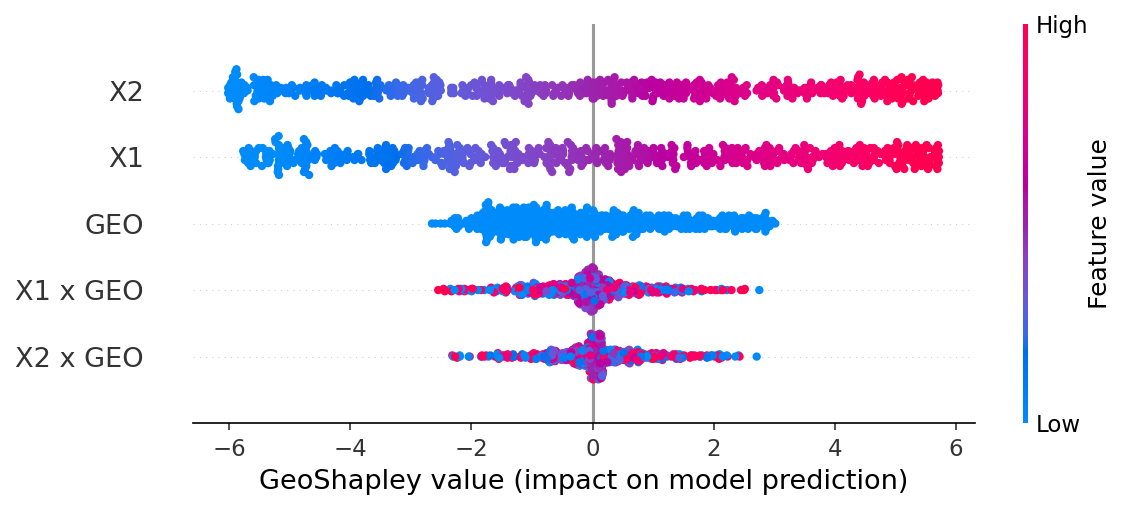

In [21]:
gpr_rslt.summary_plot(dpi=150)